## Introduction

This is a notebook showing basic financial analysis of certain stocks. We perform some explanatory anaysis, deal with missing values, and compare the adjusted close price to the actual close price using information from yfinance.

Sections:

1. Basic Analysis of Financial Data
2. Dealing with Missing Data
3. Adjusted Close Price

In [1]:
from google.colab import files

In [2]:
#all_stocks_5yr.csv
files.upload()

KeyboardInterrupt: ignored

In [4]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 20.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## Basic Analysis of Financial Data

In [ ]:
df = pd.read_csv('all_stocks_5yr.csv', parse_dates=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [ ]:
df['Name'].unique().shape

(505,)

In [ ]:
ibm = df[df['Name'] == 'IBM']

In [ ]:
ibm['close']

290491    201.68
290492    200.16
290493    200.04
290494    200.09
290495    199.65
           ...  
291745    162.40
291746    159.03
291747    152.53
291748    155.34
291749    153.85
Name: close, Length: 1259, dtype: float64

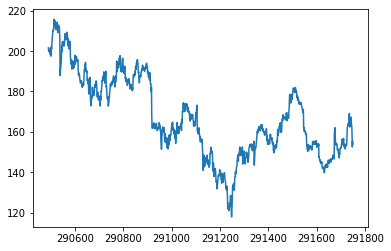

In [ ]:
ibm['close'].plot()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
dates = pd.date_range(df['date'].min(), df['date'].max())
dates

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [ ]:
close_prices = pd.DataFrame(index=dates)

In [ ]:
symbols = df['Name'].unique()

In [ ]:
df2 = pd.DataFrame(data=ibm['close'].to_numpy(), index=ibm['date'], columns=['IBM'])

In [ ]:
df2.head()

,IBM
date,
2013-02-08,201.68
2013-02-11,200.16
2013-02-12,200.04
2013-02-13,200.09
2013-02-14,199.65


In [ ]:
for symbol in symbols:

  df_sym = df[df['Name'] == symbol]

  df_tmp = pd.DataFrame(data=df_sym['close'].to_numpy(), 
                        index=df_sym['date'], columns=[symbol])

  close_prices = close_prices.join(df_tmp)

In [ ]:
close_prices.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,ADS,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALLE,ALL,ALXN,AMAT,AMD,AME,AMGN,AMG,AMP,AMT,AMZN,ANDV,ANSS,...,UTX,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,V,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WMB,WMT,WM,WRK,WU,WYNN,WYN,WY,XEC,XEL,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,60.925,38.89,154.08,32.61,44.57,11.07,50.60,50.35,87.45,38.79,28.57,38.56,37.97,35.42,62.66,32.73,24.335,NaN,45.14,93.66,13.61,2.59,41.46,86.77,146.45,66.49,77.06,261.95,53.86,74.69,...,90.09,71.10,36.4357,59.28,46.13,56.08,84.51,54.90,45.39,46.00,67.42,44.35,39.4500,92.53,41.40,48.49,40.06,34.88,107.32,NaN,36.00,71.48,36.30,NaN,14.66,126.52,59.89,30.21,66.60,27.84,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,60.340,38.89,153.42,32.84,44.73,11.20,50.38,50.26,86.66,39.45,28.92,38.48,37.88,35.31,62.76,33.03,24.400,NaN,45.25,92.30,13.66,2.67,41.51,84.92,145.57,66.49,76.38,257.21,54.55,74.71,...,89.61,71.11,36.2119,59.31,46.14,55.65,84.80,54.62,45.66,45.70,67.70,44.32,39.0825,92.47,41.48,48.60,40.14,35.26,106.47,NaN,35.74,71.40,36.31,NaN,14.25,124.10,59.62,30.14,66.75,27.94,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,60.360,38.91,152.32,33.15,44.90,11.31,50.15,49.50,85.78,38.63,29.16,41.05,37.82,36.74,62.70,33.02,24.430,NaN,45.61,90.21,13.66,2.77,41.82,84.54,145.75,67.49,75.59,258.70,53.49,75.74,...,89.98,71.36,36.3524,59.12,45.65,56.12,85.57,54.23,45.53,45.89,68.16,44.44,39.2000,91.99,41.95,48.18,39.93,35.51,110.81,NaN,35.84,71.40,36.46,NaN,14.34,122.67,59.62,30.31,67.00,28.00,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


## Dealing with Missing Data

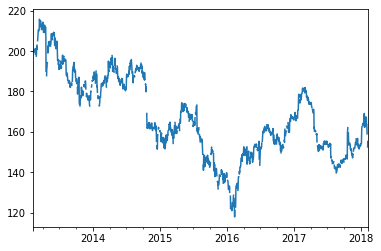

In [ ]:
close_prices['IBM'].plot()

In [ ]:
#drop rows with all nan
close_prices.dropna(axis=0, how='all', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

16755

In [ ]:
#29 stocks for no initial value -- means we need backwards fill/bfill
close_prices.iloc[0, :].isna().sum()

29

In [ ]:
#we must use forward fill first
close_prices.fillna(method='ffill', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

16704

In [ ]:
close_prices.fillna(method='bfill', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

0

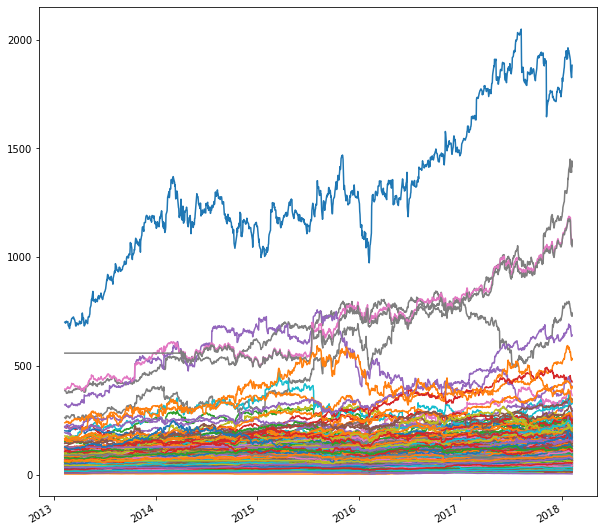

In [ ]:
close_prices.plot(legend=False, figsize=(10,10));

In [ ]:
close_prices_norm = close_prices / close_prices.iloc[0]

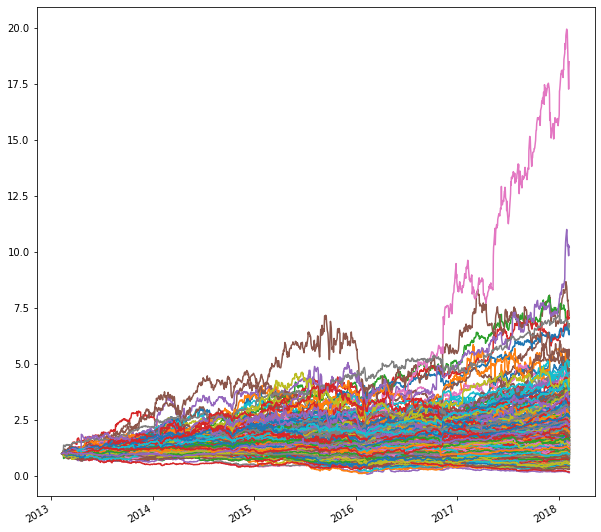

In [ ]:
close_prices_norm.plot(legend=False, figsize=(10,10))

## Adjusted Close Price

In [ ]:
#upload 'sp500sub.csv'
files.upload()

TypeError: ignored

In [ ]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


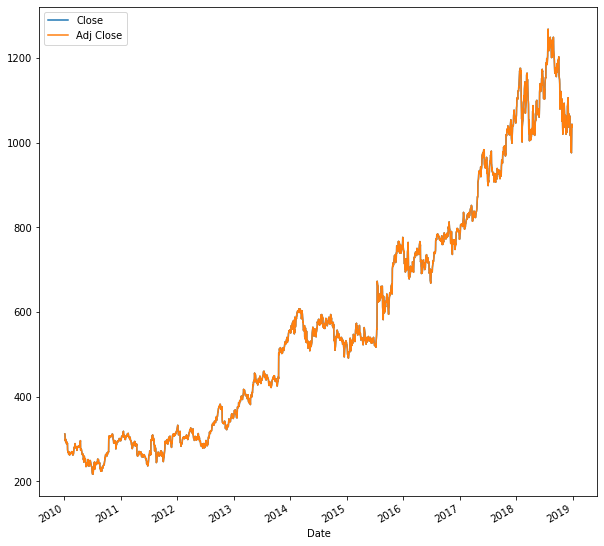

In [ ]:
goog = df[df['Name'] == 'GOOG']
goog[['Close', 'Adj Close']].plot(figsize=(10,10))

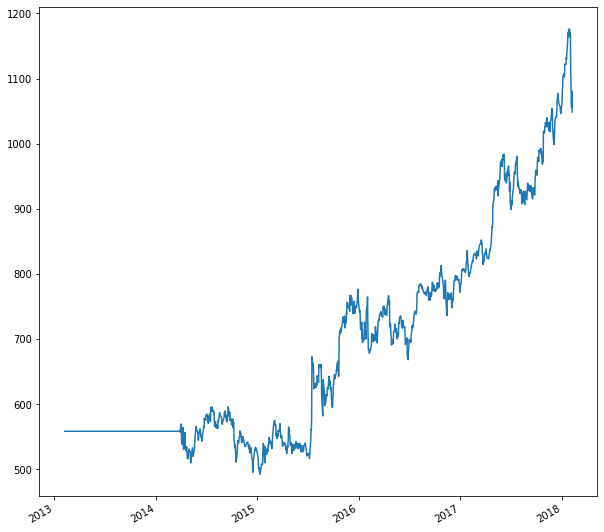

In [ ]:
close_prices['GOOG'].plot(figsize=(10,10))

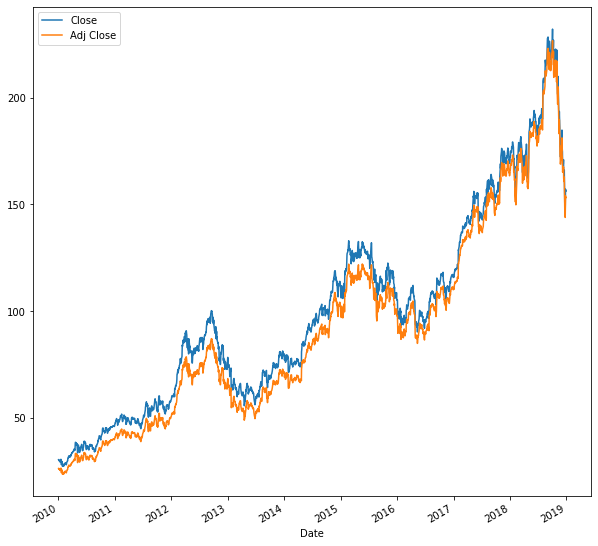

In [ ]:
aapl = df[df['Name'] == 'AAPL']
aapl[['Close', 'Adj Close']].plot(figsize=(10,10))

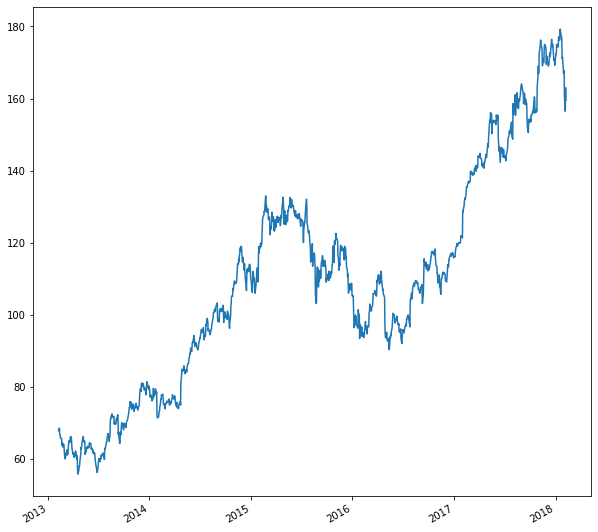

In [ ]:
close_prices['AAPL'].plot(figsize=(10,10))